# Import

In [1]:
import numpy as np
import pandas as pd

from pyMSOO.MFEA.model import SM_MFEA
from pyMSOO.utils.Crossover import *
from pyMSOO.utils.Mutation import *
from pyMSOO.utils.Selection import *
from pyMSOO.utils.DimensionAwareStrategy import DaS_strategy

from pyMSOO.utils.EA import * 

from pyMSOO.utils.MultiRun.RunMultiTime import * 
from pyMSOO.utils.MultiRun.RunMultiBenchmark import * 
from pyMSOO.MFEA.benchmark.continous.utils import Individual_func
from pyMSOO.utils.LoadSaveModel.load_utils import loadModel

# Run

In [2]:
from thesis_2 import func, get_data, get_tasks

1 time

In [3]:
def get_best_val(LP_idx, DaS):
    tasks, _ = get_tasks(LP_idx, 10)
    models = loadModel(f'./THESIS_RESULTS/LP{LP_idx}_{DaS}.mso', ls_tasks= tasks, set_attribute= True)
    
    solves = [model.last_pop.get_solves()[0].genes for model in models.ls_model]
    is_valid = [tasks[0].check_valid(model.last_pop.get_solves()[0].genes)[0] for model in models.ls_model] 
    results = [tasks[0](model.last_pop.get_solves()[0].genes) for model in models.ls_model]
    return solves, is_valid, results
    # return np.min(results), np.average(results), np.max(results), results, solves

In [5]:
for LP_idx in [1, 2]:
    for DaS in [0]:
        solves, is_valid, results = get_best_val(LP_idx, DaS)
        print(f"{LP_idx}, {DaS}: {is_valid}, {results}")
    print()

(25,) (35,) (35,) (35, 25)
1, 0: [True, False, True], [18.49190219702325, 13.725070439098635, 21.660409559125355]

(100,) (1032,) (1032,) (1032, 100)
2, 0: [False, True, True], [50.19812786500764, 51.340089473676656, 47.39669501001949]



(25,) (35,) (35,) (35, 25)


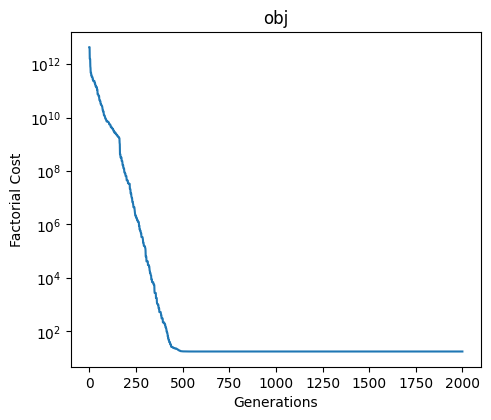

In [15]:
tasks, _ = get_tasks(1, 10)
models = loadModel(f'./THESIS_RESULTS/LP{1}_{0}.mso', ls_tasks= tasks, set_attribute= True)
model = models.ls_model[0]
model.render_history(yscale='log')

In [6]:
mi, avg, ma, _ = get_best_val(1, 1)
mi, avg, ma

(25.76563400201401, 2506002080011812.5, 6953433281275128.0)

In [7]:
SBX_models = [loadModel(f'./THESIS_RESULTS/LP{idx_data}_0.mso', ls_tasks= tasks, set_attribute= True) for idx_data in range(1, 4)]

FileNotFoundError: [Errno 2] No such file or directory: './THESIS_RESULTS/LP2_0.mso'

In [32]:
for SBX_m in SBX_models:
    print(np.average([tasks[0](model.last_pop.get_solves()[0].genes) for model in SBX_m.ls_model]))

23.302258507537122